In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('Football_data_merged_cleaned.csv')
df.head()

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,appearance_id,game_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type,type,minute,type_y
0,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2320457_124732,2320457.0,2013-08-04,John Anthony Brooks,DFB,0.0,0.0,0.0,0.0,120.0,2013.0,First Round,2.0,3.0,0.0,0.0,Ervin Lamce,Jos Luhukay,Grummi Arena,5446.0,Benjamin Cortus,Borussia Dortmund,Hertha BSC,02:03:00,domestic_cup,Unknown,0.0,Unknown
1,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321034_124732,2321034.0,2013-08-10,John Anthony Brooks,L1,0.0,0.0,1.0,0.0,90.0,2013.0,1. Matchday,6.0,1.0,1.0,18.0,Jos Luhukay,Armin Veh,Olympiastadion Berlin,54376.0,Michael Weiner,Hertha BSC,eintracht frankfurt Football ag,06:01:00,domestic_league,Unknown,32.0,Goals
2,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321049_124732,2321049.0,2013-08-18,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,8.0,2013.0,2. Matchday,2.0,2.0,11.0,6.0,Michael Wiesinger,Jos Luhukay,Max-Morlock-Stadion,37068.0,Guido Winkmann,1.FC Nuremberg,Hertha BSC,02:02:00,domestic_league,Unknown,71.0,Cards
3,49723.0,Timothy Chandler,2023.0,24.0,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00,Unknown,2321049_49723,2321049.0,2013-08-18,Timothy Chandler,L1,1.0,0.0,0.0,0.0,33.0,2013.0,2. Matchday,2.0,2.0,11.0,6.0,Michael Wiesinger,Jos Luhukay,Max-Morlock-Stadion,37068.0,Guido Winkmann,1.FC Nuremberg,Hertha BSC,02:02:00,domestic_league,Unknown,71.0,Cards
4,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321061_124732,2321061.0,2013-08-24,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,23.0,2013.0,3. Matchday,1.0,0.0,5.0,16.0,Jos Luhukay,Thorsten Fink,Olympiastadion Berlin,63574.0,Marco Fritz,Hertha BSC,Hamburger SV,01:00:00,domestic_league,Unknown,23.0,Substitutions


In [3]:
df['name'].value_counts()

Fabian Johnson         1095
Timothy Chandler        199
John Anthony Brooks     178
Aron Johannsson         178
Christian Pulisic       177
                       ... 
Owen Otasowie             1
David Yelldell            1
Russell Canouse           1
Jonathan Klinsmann        1
Jonathan Spector          1
Name: name, Length: 92, dtype: int64

In [4]:
df['country_of_birth'].value_counts()

United States    3643
Germany           851
Italy              70
England            39
Netherlands        39
UdSSR              22
Colombia           15
Ethiopia            5
Ireland             2
Name: country_of_birth, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


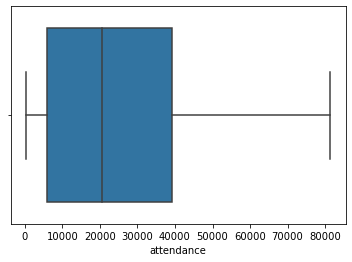

In [5]:
sns.boxplot(df['attendance'])
plt.show()    

In [6]:
# Outlier removal

# Winsorization

def iqr_winsorization(df,thresh = 1.5):
    df1 = df.copy()
    columns_to_treat = df1.select_dtypes(include = 'number').columns

    for c in columns_to_treat:
        q1 = df1[c].quantile(0.25)
        q3 = df1[c].quantile(0.75) 
        iqr = q3 - q1

        lower = q1 - thresh*iqr
        upper = q3 + thresh*iqr

        # Winsorize outliers
        # Imputing
        df1.loc[df1[c] < lower, c] = lower
        df1.loc[df1[c] > upper, c] = upper

    return df1

In [7]:
df2 = iqr_winsorization(df.copy())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


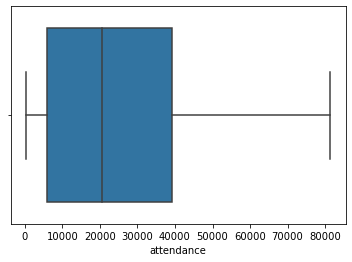

In [8]:
sns.boxplot(df2['attendance'])
plt.show()

### **Performance Analysis**
1. How does a player's total minutes played correlate with their goals and assists over different seasons?
2. What is the impact(psychological) of yellow and red cards on a player's overall performance?
3. Optional => Which player consistently performs better in high-pressure matches based on minutes played and card accumulation?

### **Player Profile and Market Value**
1. How does a player's height and dominant foot affect their market value in euros?
2. Are left-footed players more valuable than right-footed players across different leagues?

### **Team Comparison**
1. How do home club and away club positions differ based on match outcomes?
2. Which club shows the biggest seasonal improvement in home and away performances?

### **Attendance and Stadium Analysis**
1. Does attendance spike when certain referees officiate high-stakes matches?
2. Are certain stadiums consistently associated with higher attendance figures?

### **Referee Analysis**
1. Which referees officiate matches with the highest number of yellow and red cards?
2. Are matches officiated by experienced referees less chaotic in terms of cards and fouls?

### **Substitution Patterns**
1. Is there a winning pattern for teams substituting offensive players after the 70th minute?
2. What impact do substitutions have on final match results?

### **Event Analysis**
1. At what minute of the game do most goals occur, and does this vary by competition type?
2. Is there a prime minute when most winning teams score their goals?

### **Competition Analysis**
1. Which competition type has the highest average goals scored per match?
2. Are league-based competitions less aggressive (fewer cards) than cup tournaments?

### **Player Attributes and Demographics**
1. Do taller players have a greater advantage in scoring headers compared to shorter players?
2. What age group of players tends to receive the highest market value?

### **Contract Management**
1. How do contract expiration dates affect a player's performance leading up to renewal?
2. What trends exist in agent representation among high-value players?

In [10]:
# Above analysis will be done in Tableau(as instructed by mam). It can be done partially or fully in tableau. Please name the file in tableau in a 
# sequential and meaningful manner

# Probabilities

In [12]:
# Q1 => Probability of getting 'type' as 'Goals', given the player is from 'Germany'
# A : The 'type' is goal
# B : The player is from Germany
# p(A/B) = p(A and B) / p(B)
# p(A and B) => The type is goal and the player is from Germany
df_p_a_and_b = df2[(df2['type_y'] == 'Goals') & (df2['country_of_birth'] == 'Germany')].shape[0]
df_p_b = df2[df2['country_of_birth'] == 'Germany'].shape[0]

print("Probability of getting type as Goals, given the player is from Germany is:",(df_p_a_and_b)/(df_p_b))

Probability of getting type as Goals, given the player is from Germany is: 0.07873090481786134


In [13]:
# Q2 => Probability of 'sub_position' being 'Right-Back' given that the player is from 'right' foot playing category
# A : The sub position is right-back
# B : Player is 'right' footed
# p(A/B) = p(A and B) / p(B)
# p(A and B) => sub position is right-back and player is right footed
# p(B) => player is 'right' footed
df_p_a_and_b = df2[(df2['sub_position'] == 'Right-Back') & (df2['foot'] == 'right')].shape[0]
df_p_b = df2[df2['foot'] == 'right'].shape[0]
print("Probability of sub_position being Right-Back given that the player is from right foot playing category is:",df_p_a_and_b / df_p_b)

Probability of sub_position being Right-Back given that the player is from right foot playing category is: 0.11180590295147574


In [14]:
# Q3 => Probability of 'away_club_goals' being greater than 2.0 given that the player is from 'United States'
# A : The away_club_goals are greater than 2.0 
# B : The player is from 'United States'
# p(A/B) => p(A and B) / p(B)
# p(A and B) => away_club_goals are greater than 2.0 and the player is from 'United States'
# p(B) => player is from 'United States'
df_p_a_and_b = df2[(df2['away_club_goals'] > 2.0) & (df2['country_of_birth'] == 'United States')].shape[0]
df_p_b = df2[df2['country_of_birth'] == 'United States'].shape[0]
print("Probability of away_club_goals being greater than 2.0 given that the player is from United States is:",df_p_a_and_b / df_p_b)

Probability of away_club_goals being greater than 2.0 given that the player is from United States is: 0.11913258303595937


# Data Sampling

In [16]:
# Q1 => Sampling Matches to Analyze Optimal Stadium Attendance

high_att_mark = df2['attendance'].quantile(0.75)
low_att_mark = df2['attendance'].quantile(0.25)

high_sample = df2[df2['attendance'] >= high_att_mark].sample(n = 300, random_state = 5) # data greater than 75th percentile
low_sample = df2[df2['attendance'] <= low_att_mark].sample(n = 300, random_state = 5) # data less than 25th percentile

total_sample_data = pd.concat([high_sample,low_sample])

In [17]:
total_sample_data.head()

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,appearance_id,game_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type,type,minute,type_y
1706,315779.0,Christian Pulisic,2023.0,5.0,christian-pulisic,United States,1998-09-18,Right Winger,Attack,right,177.0,25000000.0,58000000.0,2027-06-30 00:00:00,Unknown,3098011_315779,3098011.0,2018-11-06,Christian Pulisic,CL,0.0,0.0,0.0,0.0,59.0,2018.0,Group A,2.0,0.0,7.0,2.666667,Diego Simeone,Lucien Favre,Civitas Metropolitano,61023.0,Daniele Orsato,club atletico de madrid sad,Borussia Dortmund,02:00:00,international_cup,Unknown,59.000000,Substitutions
70,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,192.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2581828_124732,2581828.0,2016-02-06,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,90.0,2015.0,20. Matchday,0.0,0.0,3.0,2.000000,Pal Dardai,Thomas Tuchel,Olympiastadion Berlin,74244.0,Marco Fritz,Hertha BSC,Borussia Dortmund,00:00:00,domestic_league,Unknown,61.380952,Unknown
591,49723.0,Timothy Chandler,2023.0,24.0,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00,Unknown,2704212_49723,2704212.0,2016-08-27,Timothy Chandler,L1,0.0,0.0,0.0,0.0,40.0,2016.0,1. Matchday,1.0,0.0,7.0,15.000000,Niko Kovac,Markus Weinzierl,Commerzbank Arena,47000.0,Wolfgang Stark,Eintracht Frankfurt Fuayball AG,FC Schalke 04,01:00:00,domestic_league,Unknown,70.956522,Unknown
42,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,192.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2460838_124732,2460838.0,2015-03-06,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,90.0,2014.0,24. Matchday,0.0,0.0,18.0,14.000000,Huub Stevens,Pa Dardai,Mercedes-Benz Arena,45420.0,Dr. Felix Brych,Verein Bewegungsspiele Stuttgart 1893,Hertha BSC,00:00:00,domestic_league,Unknown,47.000000,Unknown
18,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,192.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321342_124732,2321342.0,2014-04-26,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,90.0,2013.0,32. Matchday,2.0,0.0,10.0,18.000000,Jos Luhukay,Torsten Lieberknecht,Olympiastadion Berlin,51953.0,Thorsten Kinhh Ffer,Hertha BSC,Eintracht Braunschweig,02:00:00,domestic_league,Unknown,61.000000,Goals


Mean is: 9.552262745583963
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.638184503792231
Variance is: 21.512755491218382
None


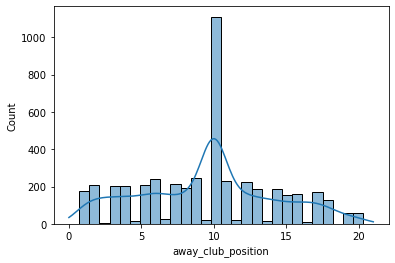

In [78]:
# Checking if 'away_club_position' column follows 

print(num_calc('away_club_position',df))

sns.histplot(df['away_club_position'], kde = True)
plt.show()

In [52]:
# The main column is showing a normal distribution. For CLT to follow, we need to make sure that the samples, when their sizes are increased,
# achieves a near to or exact normal distribution curve(bell shaped curve)

In [34]:
def num_calc(col,df):
    print("Mean is:",st.mean(df[col]))
    print("Median is:",st.median(df[col]))
    print("Mode is:",st.mode(df[col]))
    print("Standard Deviation is:",st.stdev(df[col]))
    print("Variance is:",st.stdev(df[col])**2)

Mean is: 9.610601851851852
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.470324579096646
Variance is: 19.983801842475604
None


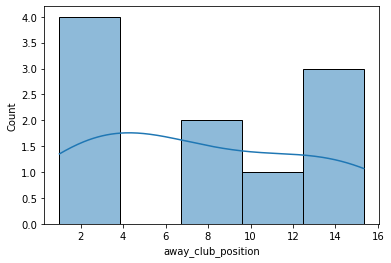

In [58]:
# Sample size of 10
sample_10 = df.sample(n = 10, random_state = 90)
print(num_calc('away_club_position',sample_300))
sns.histplot(sample_10['away_club_position'],kde = True)
plt.show()

Mean is: 9.610601851851852
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.470324579096646
Variance is: 19.983801842475604
None


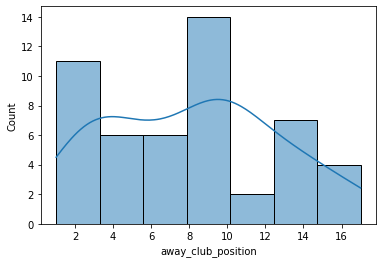

In [60]:
# Sample size of 50
sample_50 = df.sample(n = 50, random_state = 90)
print(num_calc('away_club_position',sample_300))
sns.histplot(sample_50['away_club_position'],kde = True)
plt.show()

Mean is: 9.610601851851852
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.470324579096646
Variance is: 19.983801842475604
None


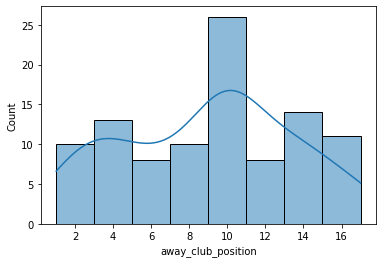

In [62]:
# Sample size of 100
sample_100 = df.sample(n = 100, random_state = 90)
print(num_calc('away_club_position',sample_300))
sns.histplot(sample_100['away_club_position'],kde = True)
plt.show()

Mean is: 9.610601851851852
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.470324579096646
Variance is: 19.983801842475604
None


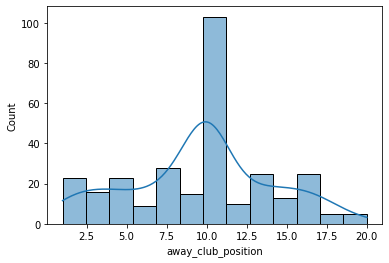

In [54]:
# Sample size of 300
sample_300 = df.sample(n = 300, random_state = 90)
print(num_calc('away_club_position',sample_300))
sns.histplot(sample_300['away_club_position'],kde = True)
plt.show()

Mean is: 9.584494444444445
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.620348252814037
Variance is: 21.347617977281725
None


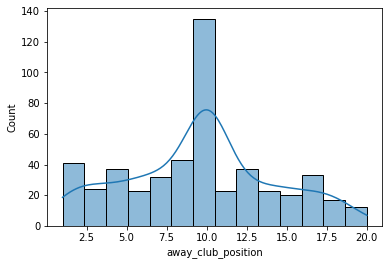

In [64]:
# Sample size of 500

sample_500 = df.sample(n = 500, random_state = 90)
print(num_calc('away_club_position',sample_500))
sns.histplot(sample_500['away_club_position'],kde = True)
plt.show()

Mean is: 9.664647222222222
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.700765429713056
Variance is: 22.09719562518537
None


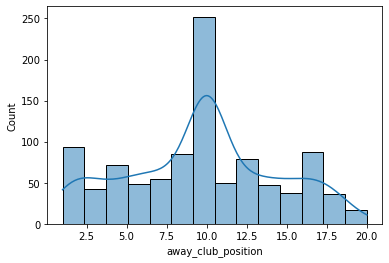

In [66]:
# Sample size of 1000

sample_1000 = df.sample(n = 1000, random_state = 90)
print(num_calc('away_club_position',sample_1000))
sns.histplot(sample_1000['away_club_position'],kde = True)
plt.show()

Mean is: 9.62119212962963
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.695346079035378
Variance is: 22.046274801912897
None


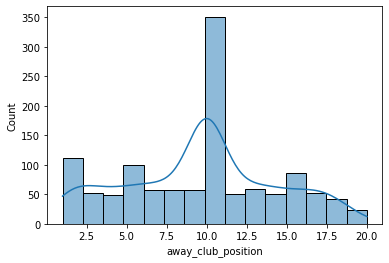

In [68]:
# Sample size of 1200

sample_1200 = df.sample(n = 1200, random_state = 90)
print(num_calc('away_club_position',sample_1200))
sns.histplot(sample_1200['away_club_position'],kde = True)
plt.show()

Mean is: 9.58275
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.652503138740832
Variance is: 21.6457854559933
None


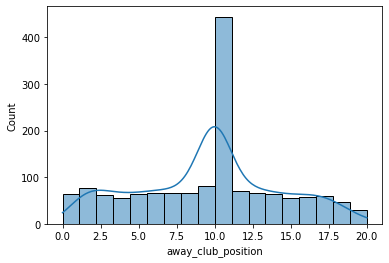

In [70]:
# Sample size of 1500

sample_1500 = df.sample(n = 1500, random_state = 90)
print(num_calc('away_club_position',sample_1500))
sns.histplot(sample_1500['away_club_position'],kde = True)
plt.show()

Mean is: 9.58275
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.652503138740832
Variance is: 21.6457854559933
None


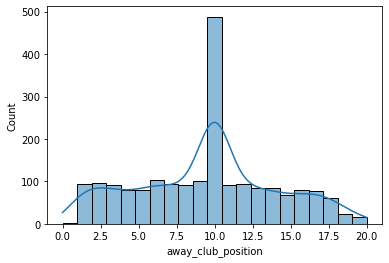

In [72]:
# Sample size of 2000

sample_2000 = df.sample(n = 2000, random_state = 90)
print(num_calc('away_club_position',sample_1500))
sns.histplot(sample_2000['away_club_position'],kde = True)
plt.show()

Mean is: 9.487632424475166
Median is: 10.0
Mode is: 10.0
Standard Deviation is: 4.665904230046803
Variance is: 21.77066228396865
None


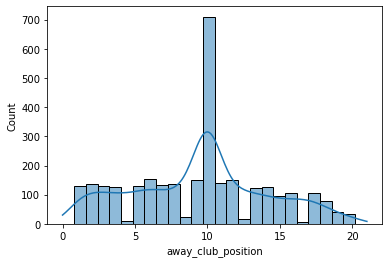

In [74]:
# Sample size of 3000

sample_3000 = df.sample(n = 3000, random_state = 90)
print(num_calc('away_club_position',sample_3000))
sns.histplot(sample_3000['away_club_position'],kde = True)
plt.show()

### Sample size of 2000 can be termed as the sample which represents the total distribution, as the mean of this sample(9.58) is very close to the population mean(9.55)

### The median of this sample (10.0) is exactly equal to the population median(10.0) which again proves that the sample is the best sample for representing the entire population

### The size of the sample is greater than 30(size is of 2000)

# All the above properties suggests that the column 'away_club_position' follows Central Limit Theorem(CLT)

## Seeing the sample distributions alone, we can say that the distribution are changing and achievieng a normal distribution
## So, now we will plot the distributions of all samples means 

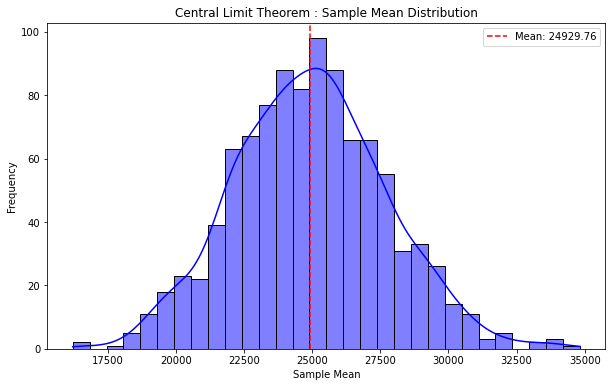

In [28]:
attendance_data = df['attendance'].dropna()  # Remove missing values

sample_size = 50
num_samples = 1000

sample_means = [np.mean(np.random.choice(attendance_data, sample_size, replace=True)) for _ in range(num_samples)]

plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, color="blue")
plt.axvline(np.mean(sample_means), color='red', linestyle='dashed', label=f"Mean: {np.mean(sample_means):.2f}")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Central Limit Theorem : Sample Mean Distribution")
plt.legend()
plt.show()

In [1]:
# As seen above, we can say that the samples are normally distributed, irrespective of the population's distribution.
# So, we can say that the CLT theorem follows.

# Logistic Regression => 

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   player_id                    4686 non-null   float64       
 1   name                         4686 non-null   object        
 2   last_season                  4686 non-null   float64       
 3   current_club_id              4686 non-null   float64       
 4   player_code                  4686 non-null   object        
 5   country_of_birth             4686 non-null   object        
 6   date_of_birth                4686 non-null   object        
 7   sub_position                 4686 non-null   object        
 8   position                     4686 non-null   object        
 9   foot                         4686 non-null   object        
 10  height_in_cm                 4686 non-null   float64       
 11  market_value_in_eur          4686 non-null 

In [298]:
df_log_1 = df[['height_in_cm','foot','minutes_played','competition_type','round','attendance','yellow_cards','red_cards','type_y']]
df_log_1.head()

,height_in_cm,foot,minutes_played,competition_type,round,attendance,yellow_cards,red_cards,type_y
0,194.0,left,120.0,domestic_cup,First Round,5446.0,0.0,0.0,Unknown
1,194.0,left,90.0,domestic_league,1. Matchday,54376.0,0.0,0.0,Goals
2,194.0,left,8.0,domestic_league,2. Matchday,37068.0,0.0,0.0,Cards
3,186.0,right,33.0,domestic_league,2. Matchday,37068.0,1.0,0.0,Cards
4,194.0,left,23.0,domestic_league,3. Matchday,63574.0,0.0,0.0,Substitutions


In [300]:
# Encoding
encoder = preprocessing.LabelEncoder()

df_log_1['type_y.enc'] = encoder.fit_transform(df_log_1['type_y'])
df_log_1['foot.enc'] = encoder.fit_transform(df_log_1['foot'])
df_log_1['competition_type.enc'] = encoder.fit_transform(df_log_1['competition_type'])
df_log_1['round.enc'] = encoder.fit_transform(df_log_1['round'])
df_log_1.head()

C:\Users\gaurav\AppData\Local\Temp\ipykernel_2944\2513536210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log_1['type_y.enc'] = encoder.fit_transform(df_log_1['type_y'])
C:\Users\gaurav\AppData\Local\Temp\ipykernel_2944\2513536210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log_1['foot.enc'] = encoder.fit_transform(df_log_1['foot'])
C:\Users\gaurav\AppData\Local\Temp\ipykernel_2944\2513536210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,height_in_cm,foot,minutes_played,competition_type,round,attendance,yellow_cards,red_cards,type_y,type_y.enc,foot.enc,competition_type.enc,round.enc
0,194.0,left,120.0,domestic_cup,First Round,5446.0,0.0,0.0,Unknown,3,1,0,46
1,194.0,left,90.0,domestic_league,1. Matchday,54376.0,0.0,0.0,Goals,1,1,1,0
2,194.0,left,8.0,domestic_league,2. Matchday,37068.0,0.0,0.0,Cards,0,1,1,11
3,186.0,right,33.0,domestic_league,2. Matchday,37068.0,1.0,0.0,Cards,0,2,1,11
4,194.0,left,23.0,domestic_league,3. Matchday,63574.0,0.0,0.0,Substitutions,2,1,1,22


In [302]:
scaler = StandardScaler()

df_log = df_log_1.drop(['type_y','type_y.enc','foot','competition_type','round'],axis = 1)

cols = df_log.columns

df_log = scaler.fit_transform(df_log)

df_log = pd.DataFrame(df_log,columns = cols)

df_log.head()

,height_in_cm,minutes_played,attendance,yellow_cards,red_cards,foot.enc,competition_type.enc,round.enc
0,1.714002,1.637427,-0.983186,-0.342989,-0.050669,-1.648609,-2.857788,1.266732
1,1.714002,0.560965,1.479034,-0.342989,-0.050669,-1.648609,-0.007906,-1.180889
2,1.714002,-2.381363,0.608073,-0.342989,-0.050669,-1.648609,-0.007906,-0.595588
3,0.298346,-1.484312,0.608073,2.759805,-0.050669,0.387601,-0.007906,-0.595588
4,1.714002,-1.843132,1.941889,-0.342989,-0.050669,-1.648609,-0.007906,-0.010288


In [304]:
df_log_final_3 = pd.concat([df_log,df_log_1[['type_y.enc']]],axis = 1,ignore_index = False)
df_log_final_3

,height_in_cm,minutes_played,attendance,yellow_cards,red_cards,foot.enc,competition_type.enc,round.enc,type_y.enc
0,1.714002,1.637427,-0.983186,-0.342989,-0.050669,-1.648609,-2.857788,1.266732,3
1,1.714002,0.560965,1.479034,-0.342989,-0.050669,-1.648609,-0.007906,-1.180889,1
2,1.714002,-2.381363,0.608073,-0.342989,-0.050669,-1.648609,-0.007906,-0.595588,0
3,0.298346,-1.484312,0.608073,2.759805,-0.050669,0.387601,-0.007906,-0.595588,0
4,1.714002,-1.843132,1.941889,-0.342989,-0.050669,-1.648609,-0.007906,-0.010288,2
...,...,...,...,...,...,...,...,...,...
4681,0.121389,0.560965,-0.955308,-0.342989,-0.050669,0.387601,-0.007906,-0.595588,2
4682,0.121389,0.560965,-0.955308,-0.342989,-0.050669,0.387601,-0.007906,-0.595588,2
4683,0.121389,0.560965,-0.955308,-0.342989,-0.050669,0.387601,-0.007906,-0.595588,2
4684,0.121389,0.560965,-0.955308,-0.342989,-0.050669,0.387601,-0.007906,-0.595588,2


In [306]:
df_log_final_3.head()

,height_in_cm,minutes_played,attendance,yellow_cards,red_cards,foot.enc,competition_type.enc,round.enc,type_y.enc
0,1.714002,1.637427,-0.983186,-0.342989,-0.050669,-1.648609,-2.857788,1.266732,3
1,1.714002,0.560965,1.479034,-0.342989,-0.050669,-1.648609,-0.007906,-1.180889,1
2,1.714002,-2.381363,0.608073,-0.342989,-0.050669,-1.648609,-0.007906,-0.595588,0
3,0.298346,-1.484312,0.608073,2.759805,-0.050669,0.387601,-0.007906,-0.595588,0
4,1.714002,-1.843132,1.941889,-0.342989,-0.050669,-1.648609,-0.007906,-0.010288,2


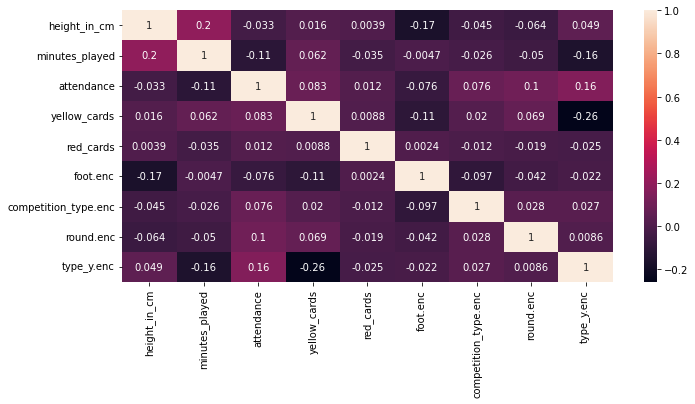

In [308]:
sns.heatmap(df_log_final_3.corr(),annot = True)
plt.gcf().set_size_inches(11,5)
plt.show()

In [312]:
traindata,testdata = train_test_split(df_log_final_3,test_size = 0.3,random_state = 104)

In [314]:
xtrain = traindata.drop(['type_y.enc'],axis = 1) 
xtest = testdata.drop(['type_y.enc'],axis = 1)
ytrain = traindata['type_y.enc']
ytest = testdata['type_y.enc']

In [316]:
logreg = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs')
logreg.fit(xtrain,ytrain)

LogisticRegression(multi_class='multinomial')

In [318]:
ypredict = logreg.predict(xtest)
ypredict

array([3, 3, 3, ..., 3, 3, 2])

In [320]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(ytest, ypredict)

# Extract True Positives (Diagonal)
tp_values = np.diag(conf_matrix)

# Extract False Positives (Sum of column - TP)
fp_values = np.sum(conf_matrix, axis=0) - tp_values

# Extract False Negatives (Sum of row - TP)
fn_values = np.sum(conf_matrix, axis=1) - tp_values

# Extract True Negatives (Remaining elements not in the row/column of the class)
tn_values = conf_matrix.sum() - (fp_values + fn_values + tp_values)


print("Unknown, Substitutions, Goals, Cards")
print("True Positives:", tp_values)
print("False Positives:", fp_values)
print("False Negatives:", fn_values)
print("True Negatives:", tn_values)

Unknown, Substitutions, Goals, Cards
True Positives: [ 10   0 188 673]
False Positives: [ 23   0 157 355]
False Negatives: [ 64 164 198 109]
True Negatives: [1309 1242  863  269]


In [322]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

print("Accuracy score:", accuracy_score(ytest, ypredict))
print("F1 score:", f1_score(ytest, ypredict, average='weighted'))  # Fix: Add `average='weighted'`
print("Recall score:", recall_score(ytest, ypredict, average='weighted'))  # Fix: Add `average='weighted'`
print("Precision score:", precision_score(ytest, ypredict, average='weighted'))  # Fix: Add `average='weighted'`

Accuracy score: 0.6194879089615932
F1 score: 0.5646569893726633
Recall score: 0.6194879089615932
Precision score: 0.5296711474235092


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [324]:
# Model shows an accuracy of 61%, placing this model in a moderate category classifier
# A recall score of 0.61 suggests that the model is able to correctly identify 61% of the true positives in the test set to be actually positive
# F1 score of 0.56 suggests that the model is able to moderately identify the given data points into different classes
# Precision score of 0.52 suggests that the model is actually able to classify 52% of data points as true positives, when the instance belonged to 
# positive class

In [326]:
print(logreg.predict_proba(xtest).shape)

(1406, 4)


In [328]:
# ROC Score
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(ytest,logreg.predict_proba(xtest),multi_class = 'ovr')
roc

0.7030426482783042

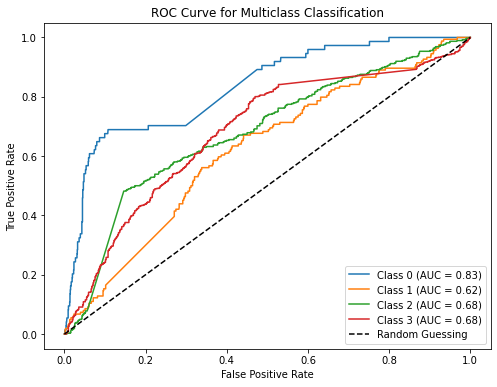

In [330]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the multiclass target (convert into multiple binary problems)
ytest_bin = label_binarize(ytest, classes=[0, 1, 2, 3])  # Adjust classes to match your encoded labels
n_classes = ytest_bin.shape[1]

# Get predicted probabilities
y_prob = logreg.predict_proba(xtest)

# Plot ROC for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(ytest_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

In [332]:
# Judging by the roc-auc curve and roc-auc value, we can say that the model is coming in a moderate stage of predicting the multi-class
# Roc-auc value of 0.703 places this model as a 'good' classifier

In [49]:
df['away_club_name'].value_counts()

Borussia Dortmund                            1066
FC Schalke 04                                 113
eintracht frankfurt Football ag               107
Stoke City                                    105
Borussia Verein fur Leibesubung 1900 e.V.     104
                                             ... 
Real Sociedad De futbol S.A.D                   1
Boavista Futebol Clube                          1
Sporting Clube de Portugal                      1
Beerschot AC                                    1
Angers SCO                                      1
Name: away_club_name, Length: 255, dtype: int64

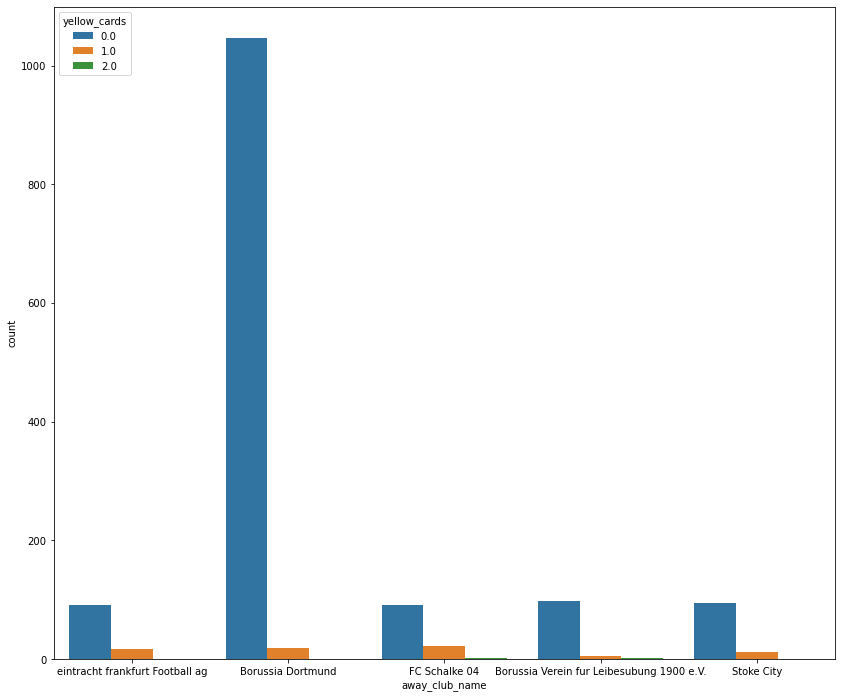

In [50]:
# Descriptive Analysis

# Number of red and yellow cards per club
df_filtered = df[df['away_club_name'].isin(['Borussia Dortmund','FC Schalke 04','eintracht frankfurt Football ag','Stoke City','Borussia Verein fur Leibesubung 1900 e.V.'])]

df_filtered.shape

sns.countplot(data = df_filtered,x = 'away_club_name',hue = 'yellow_cards')
plt.gcf().set_size_inches(14,12)
plt.show()

In [51]:
# Borussia Dortmund has played the highest matches and has produced matches where it has not received the yellow cards
# Let's plot the countplot again for red cards

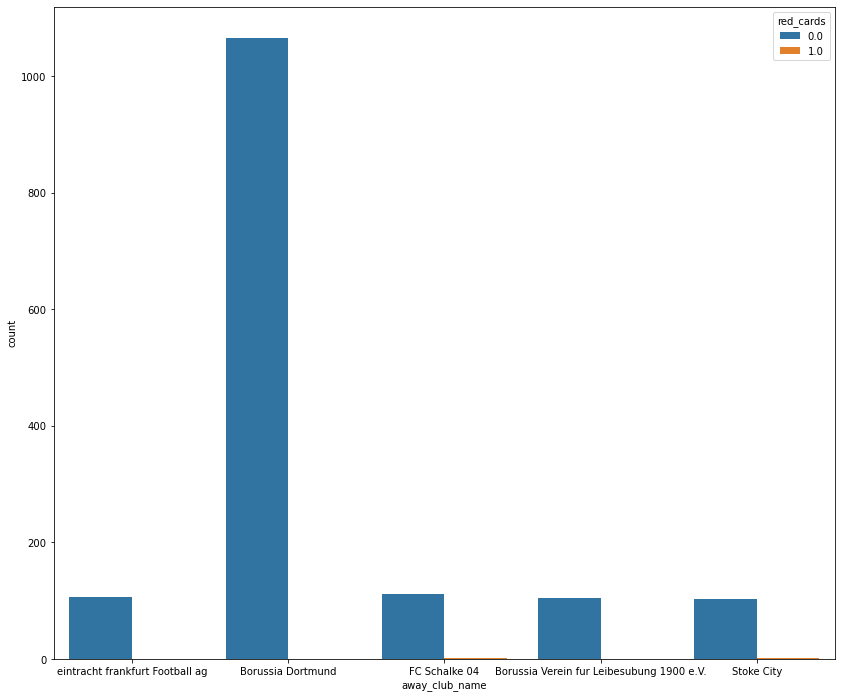

In [52]:
# Number of red and yellow cards per club
df_filtered = df[df['away_club_name'].isin(['Borussia Dortmund','FC Schalke 04','eintracht frankfurt Football ag','Stoke City','Borussia Verein fur Leibesubung 1900 e.V.'])]

df_filtered.shape

sns.countplot(data = df_filtered,x = 'away_club_name',hue = 'red_cards')
plt.gcf().set_size_inches(14,12)
plt.show()

In [53]:
# The same trend can be observed for the red cards category 

# Player profile and market value

In [55]:
df['date'] = pd.to_datetime(df['date'])
#df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   player_id                    4686 non-null   float64       
 1   name                         4686 non-null   object        
 2   last_season                  4686 non-null   float64       
 3   current_club_id              4686 non-null   float64       
 4   player_code                  4686 non-null   object        
 5   country_of_birth             4686 non-null   object        
 6   date_of_birth                4686 non-null   object        
 7   sub_position                 4686 non-null   object        
 8   position                     4686 non-null   object        
 9   foot                         4686 non-null   object        
 10  height_in_cm                 4686 non-null   float64       
 11  market_value_in_eur          4686 non-null 

In [57]:
# Descriptive Analysis

# How does a player's dominant foot affect their market value in euros?
# We will check how players are showing their market value across time separately for right and left foot

In [58]:
df_left_foot = df[(df['foot'] == 'left') & (df['name'].isin(['John Anthony Brooks','Tim Ream']))]
df_left_foot.head()

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,appearance_id,game_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type,type,minute,type_y
0,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2320457_124732,2320457.0,2013-08-04,John Anthony Brooks,DFB,0.0,0.0,0.0,0.0,120.0,2013.0,First Round,2.0,3.0,0.0,0.0,Ervin Lamce,Jos Luhukay,Grummi Arena,5446.0,Benjamin Cortus,Borussia Dortmund,Hertha BSC,02:03:00,domestic_cup,Unknown,0.0,Unknown
1,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321034_124732,2321034.0,2013-08-10,John Anthony Brooks,L1,0.0,0.0,1.0,0.0,90.0,2013.0,1. Matchday,6.0,1.0,1.0,18.0,Jos Luhukay,Armin Veh,Olympiastadion Berlin,54376.0,Michael Weiner,Hertha BSC,eintracht frankfurt Football ag,06:01:00,domestic_league,Unknown,32.0,Goals
2,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321049_124732,2321049.0,2013-08-18,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,8.0,2013.0,2. Matchday,2.0,2.0,11.0,6.0,Michael Wiesinger,Jos Luhukay,Max-Morlock-Stadion,37068.0,Guido Winkmann,1.FC Nuremberg,Hertha BSC,02:02:00,domestic_league,Unknown,71.0,Cards
4,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321061_124732,2321061.0,2013-08-24,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,23.0,2013.0,3. Matchday,1.0,0.0,5.0,16.0,Jos Luhukay,Thorsten Fink,Olympiastadion Berlin,63574.0,Marco Fritz,Hertha BSC,Hamburger SV,01:00:00,domestic_league,Unknown,23.0,Substitutions
5,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321067_124732,2321067.0,2013-08-31,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,90.0,2013.0,4. Matchday,2.0,0.0,8.0,6.0,Dieter Hecking,Jos Luhukay,Volkswagen Arena,28625.0,Robert Hartmann,verein fur leibesubungen,Hertha BSC,02:00:00,domestic_league,Unknown,22.0,Unknown


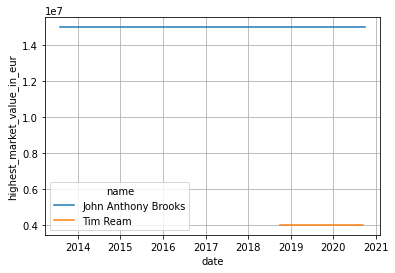

In [59]:
sns.lineplot(data = df_left_foot, x = 'date', y = 'highest_market_value_in_eur', hue = 'name')
plt.grid('True')
plt.show()

In [60]:
q = df[df['foot'] == 'right']
q['name'].value_counts()

Fabian Johnson        1095
Timothy Chandler       199
Aron Johannsson        178
Christian Pulisic      177
Geoff Cameron          176
                      ... 
Russell Canouse          1
Owen Otasowie            1
Jonathan Klinsmann       1
Kyle Scott               1
Jonathan Spector         1
Name: name, Length: 81, dtype: int64

In [61]:
df_right_foot = df[(df['foot'] == 'right') & (df['name'].isin(['Aron Johannsson','Timothy Chandler']))]
df_right_foot.head()

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,appearance_id,game_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type,type,minute,type_y
3,49723.0,Timothy Chandler,2023.0,24.0,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00,Unknown,2321049_49723,2321049.0,2013-08-18,Timothy Chandler,L1,1.0,0.0,0.0,0.0,33.0,2013.0,2. Matchday,2.0,2.0,11.0,6.0,Michael Wiesinger,Jos Luhukay,Max-Morlock-Stadion,37068.0,Guido Winkmann,1.FC Nuremberg,Hertha BSC,02:02:00,domestic_league,Unknown,71.0,Cards
35,49723.0,Timothy Chandler,2023.0,24.0,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00,Unknown,2460766_49723,2460766.0,2014-12-17,Timothy Chandler,L1,0.0,0.0,0.0,0.0,90.0,2014.0,16. Matchday,4.0,4.0,9.0,13.0,Thomas Schaaf,Jos Luhukay,Commerzbank Arena,40200.0,Guido Winkmann,Eintracht Frankfurt Fuayball AG,Hertha BSC,04:04:00,domestic_league,Unknown,21.0,Goals
54,49723.0,Timothy Chandler,2023.0,24.0,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00,Unknown,2460919_49723,2460919.0,2015-05-16,Timothy Chandler,L1,0.0,0.0,0.0,0.0,90.0,2014.0,33. Matchday,0.0,0.0,13.0,11.0,Pal Dardai,Thomas Schaaf,Olympiastadion Berlin,60168.0,Florian Meyer,Hertha BSC,eintracht frankfurt Football ag,00:00:00,domestic_league,Unknown,65.0,Unknown
58,119169.0,Aron Johannsson,2018.0,86.0,aron-johannsson,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar,2581180_119169,2581180.0,2015-08-21,Aron Johannsson,L1,0.0,0.0,0.0,0.0,80.0,2015.0,2. Matchday,1.0,1.0,7.0,15.0,Pal Dardai,Viktor Skrypnyk,Olympiastadion Berlin,56376.0,Sascha Stegemann,Hertha BSC,Sportverein Werder Bremen von 1899,01:01:00,domestic_league,Unknown,80.0,Substitutions
110,49723.0,Timothy Chandler,2023.0,24.0,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00,Unknown,2704545_49723,2704545.0,2017-02-25,Timothy Chandler,L1,0.0,0.0,0.0,0.0,90.0,2016.0,22. Matchday,2.0,0.0,5.0,6.0,Pal Dardai,Niko Kovac,Olympiastadion Berlin,43323.0,Sascha Stegemann,Hertha BSC,eintracht frankfurt Football ag,02:00:00,domestic_league,Unknown,66.8,Unknown


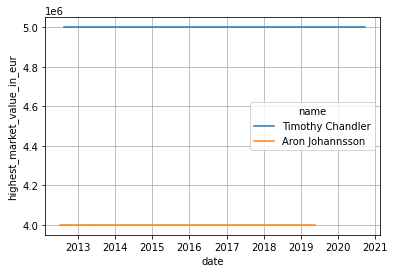

In [62]:
sns.lineplot(data = df_right_foot, x = 'date', y = 'highest_market_value_in_eur', hue = 'name')
plt.grid('True')
plt.show()

### Overall, we can say that the right footed players are showing high market value as comapred to left footed players
### Although, other factors have to be considered, such as height, historical data, etc for further analysis

# Linear(Single and Multiple) Regression

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   player_id                    4686 non-null   float64       
 1   name                         4686 non-null   object        
 2   last_season                  4686 non-null   float64       
 3   current_club_id              4686 non-null   float64       
 4   player_code                  4686 non-null   object        
 5   country_of_birth             4686 non-null   object        
 6   date_of_birth                4686 non-null   object        
 7   sub_position                 4686 non-null   object        
 8   position                     4686 non-null   object        
 9   foot                         4686 non-null   object        
 10  height_in_cm                 4686 non-null   float64       
 11  market_value_in_eur          4686 non-null 

In [66]:
df.corr()[['market_value_in_eur']].sort_values('market_value_in_eur',ascending = False)

,market_value_in_eur
market_value_in_eur,1.000000
highest_market_value_in_eur,0.924801
player_id,0.762922
game_id,0.714713
season,0.660129
last_season,0.592261
minutes_played,0.127415
home_club_goals,0.086107
minute,0.079463
red_cards,-0.021495


In [67]:
df_linear = pd.DataFrame()
df_linear['highest_market_value_in_eur'] = df['highest_market_value_in_eur']
df_linear['height_in_cm'] = df['height_in_cm']

In [68]:
df_linear['highest_market_value_in_eur'] = scaler.fit_transform(df_linear['highest_market_value_in_eur'].values.reshape(-1,1))
df_linear['height_in_cm'] = scaler.fit_transform(df_linear['height_in_cm'].values.reshape(-1,1))

In [69]:
df_linear.head()

,highest_market_value_in_eur,height_in_cm
0,-0.004735,1.714002
1,-0.004735,1.714002
2,-0.004735,1.714002
3,-0.580054,0.298346
4,-0.004735,1.714002


In [70]:
x = np.array(df_linear['highest_market_value_in_eur']).reshape(-1,1)
x.shape

(4686, 1)

In [71]:
y = np.array(df_linear['height_in_cm']).reshape(-1,1)
y.shape

(4686, 1)

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 176)

In [73]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(3748, 1) (938, 1) (3748, 1) (938, 1)


In [74]:
linearmodel = LinearRegression().fit(xtrain,ytrain)
score = linearmodel.score(xtrain,ytrain)
print(score)

0.005455829085077135


In [75]:
print("Intercept:",linearmodel.intercept_)
print("Slope:",linearmodel.coef_)

Intercept: [-0.00340376]
Slope: [[-0.07403333]]


In [76]:
ypredict = linearmodel.predict(xtest)
ypredict.shape

(938, 1)

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(ytest,ypredict)
print("MSE:",mse)

mae = mean_absolute_error(ytest,ypredict)
print("MAE:",mae)

rmse = mean_squared_error(ytest,ypredict, squared = False)
print("RMSE:",rmse)

MSE: 0.9828351427344771
MAE: 0.7447555066229334
RMSE: 0.9913804228117867


In [78]:
from sklearn.metrics import r2_score

print("R-2 score:",r2_score(ytest,ypredict))

R-2 score: 0.005198021168819844


# Multiple Regression (As the above model shows poor performance, we will try to incorporate more features and see if the model gets better or not)

In [80]:
df_filtered3 = df.select_dtypes(include = 'number')
cols = df_filtered3.columns

df_filtered = scaler.fit_transform(df_filtered3)
df_filtered = pd.DataFrame(df_filtered,columns = cols)
df_filtered.head()

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur,game_id,yellow_cards,red_cards,goals,assists,minutes_played,season,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance,minute
0,-0.515742,0.993621,-0.070528,1.714002,-0.548763,-0.004735,-1.036172,-0.342989,-0.050669,-0.295742,-0.247411,1.637427,-1.127926,0.211045,1.524656,-1.459431,-2.059703,-0.983186,-3.303535
1,-0.515742,0.993621,-0.070528,1.714002,-0.548763,-0.004735,-1.035094,-0.342989,-0.050669,2.157084,-0.247411,0.560965,-1.127926,3.306371,-0.062138,-1.271925,1.821540,1.479034,-1.625400
2,-0.515742,0.993621,-0.070528,1.714002,-0.548763,-0.004735,-1.035066,-0.342989,-0.050669,-0.295742,-0.247411,-2.381363,-1.127926,0.211045,0.731259,0.603134,-0.765955,0.608073,0.419828
3,-0.918546,0.993621,-0.379804,0.298346,-0.674189,-0.580054,-1.035066,2.759805,-0.050669,-0.295742,-0.247411,-1.484312,-1.127926,0.211045,0.731259,0.603134,-0.765955,0.608073,0.419828
4,-0.515742,0.993621,-0.070528,1.714002,-0.548763,-0.004735,-1.035043,-0.342989,-0.050669,-0.295742,-0.247411,-1.843132,-1.127926,-0.562786,-0.855534,-0.521902,1.390291,1.941889,-2.097375


In [81]:
df_filtered.corr()[['market_value_in_eur']].sort_values(by = 'market_value_in_eur',ascending = False)

,market_value_in_eur
market_value_in_eur,1.000000
highest_market_value_in_eur,0.924801
player_id,0.762922
game_id,0.714713
season,0.660129
last_season,0.592261
minutes_played,0.127415
home_club_goals,0.086107
minute,0.079463
red_cards,-0.021495


In [82]:
# 2 Features

x = np.array(df_filtered[['highest_market_value_in_eur','season']]).reshape(-1,2)
y = np.array(df_filtered['market_value_in_eur'])

In [83]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x,y,test_size = 0.2,random_state = 135)

In [84]:
smodel2 = LinearRegression().fit(xtrain2,ytrain2)
print("Score:",smodel2.score(xtrain2,ytrain2))

Score: 0.8814913293325375


In [85]:
print("Intercept:",smodel2.intercept_)
print("Slope:",smodel2.coef_)

Intercept: -0.005962679437496695
Slope: [0.81700213 0.18505959]


In [86]:
ypredict2 = smodel2.predict(xtest2)
ypredict2

array([-0.41945442, -0.63097101, -0.8466766 , -0.54759025, -0.9524349 ,
       -0.77198207, -0.49220856,  0.10177514,  1.49901052, -0.56465448,
       -0.46870672, -0.52633702, -0.09042861, -0.62453339,  1.49901052,
        2.28100897, -0.49639756, -0.30419381, -0.62453339, -0.43876726,
       -0.4664581 , -0.49639756,  1.49901052,  1.49901052, -0.94068397,
       -0.4664581 ,  1.49901052, -0.13324329, -0.90951864, -0.94068397,
        1.49901052,  0.40086149, -0.64680936, -0.79967291, -0.50058656,
       -0.29131858,  2.15287314, -0.51867353,  0.16584306,  0.16584306,
        0.08889991,  1.49901052, -0.45358288, -0.71261452, -0.69381305,
       -0.78138281, -0.79967291, -0.88836698, -0.29131858, -0.56690309,
        0.63587993,  1.49901052,  1.49901052,  0.16584306,  0.024832  ,
       -0.68860131, -0.59040493, -0.50058656, -0.43876726,  1.49901052,
       -0.735605  , -0.56046548, -0.51867353, -0.57037758, -0.6821637 ,
        0.024832  , -0.06917538,  1.49901052,  1.49901052, -0.28

In [87]:
# Accuracy

print("MSE:",mean_squared_error(ytest2,ypredict2))
print("MAE:",mean_absolute_error(ytest2,ypredict2))
print("RMSE:",mean_squared_error(ytest2,ypredict2,squared = False))
print("R-2 score:",r2_score(ytest2,ypredict2))

MSE: 0.14296122773590372
MAE: 0.24764764874400436
RMSE: 0.37810213929030306
R-2 score: 0.8563605425476344


In [88]:
# 3 Features

x = np.array(df_filtered[['highest_market_value_in_eur','season','home_club_position']]).reshape(-1,3)
y = np.array(df_filtered['market_value_in_eur'])

In [89]:
xtrain3,xtest3,ytrain3,ytest3 = train_test_split(x,y,test_size = 0.2,random_state = 123)

In [90]:
linear3 = LinearRegression().fit(xtrain3,ytrain3)
print("Score:",linear3.score(xtrain3,ytrain3))

Score: 0.8824811853970723


In [91]:
print("Intercept:",linear3.intercept_)
print("Slope:",linear3.coef_)

Intercept: -0.0014403495217760274
Slope: [ 0.7880346   0.17176555 -0.07608344]


In [92]:
ypredict3 = linear3.predict(xtest3)
ypredict3

array([ 2.29482602, -0.48884027,  1.52395709, -0.53784794, -0.20440161,
        1.52395709, -0.59844513, -0.55029371,  1.52395709, -0.60481926,
       -0.63390235, -0.70311004,  0.16665749, -0.75204741, -0.49322933,
       -0.58566342,  0.03586151, -0.36990927, -0.48750343, -0.51884991,
        1.52395709,  2.17589502,  1.52395709,  1.52395709, -0.07189314,
       -0.43390155, -0.64124342, -0.48884027, -0.5936429 , -0.67577697,
       -0.63885904, -0.49738046, -0.48297664, -0.63885904,  1.52395709,
        2.00230075, -0.8969885 , -0.22724831,  1.52395709, -0.06441434,
        2.04750016,  1.52395709,  1.52395709, -0.42806159, -0.66723677,
       -0.434177  , -0.70324777,  1.52395709, -0.62937844,  1.52395709,
       -0.79583966, -0.75444852, -0.68390399, -0.62459295, -0.42909932,
       -0.34617931,  1.52395709,  1.52395709, -0.42697365, -0.00453566,
        1.52395709, -0.59352191, -0.63870458, -0.59322973,  1.52395709,
       -0.4567987 , -0.434177  ,  1.52395709, -0.6468316 , -0.55

In [93]:
# Accuracy

print("MSE:",mean_squared_error(ytest3,ypredict3))
print("MAE:",mean_absolute_error(ytest3,ypredict3))
print("RMSE:",mean_squared_error(ytest3,ypredict3,squared = False))
print("R-2 score:",r2_score(ytest3,ypredict3))

MSE: 0.1228842014123856
MAE: 0.23183607458521108
RMSE: 0.3505484294821268
R-2 score: 0.8742255698950832


In [94]:
# 4 features

x = np.array(df_filtered[['highest_market_value_in_eur','season','home_club_position','away_club_goals']]).reshape(-1,4)
y = np.array(df_filtered['market_value_in_eur'])

In [95]:
xtrain4,xtest4,ytrain4,ytest4 = train_test_split(x,y,test_size = 0.2,random_state = 34)

In [96]:
linear4 = LinearRegression().fit(xtrain4,ytrain4)
print("Score:",linear4.score(xtrain4,ytrain4))

Score: 0.8795533502418078


In [97]:
print("Intercept:",linear4.intercept_)
print("Slope:",linear4.coef_)

Intercept: -0.00018563617344544104
Slope: [ 0.78409076  0.17100851 -0.07018498 -0.02598524]


In [98]:
ypredict4 = linear4.predict(xtest4)
ypredict4

array([-0.38509398, -0.5716471 , -0.55144304, -0.35594017, -0.70828515,
       -0.75431143,  0.05851777, -0.57403222,  1.5339584 , -0.50442706,
       -0.7469456 , -0.81640216, -0.76756221, -0.47531445,  1.5339584 ,
       -0.71479285,  0.67410431,  0.59514372,  0.04535768, -0.62753205,
        1.5339584 ,  1.5339584 ,  0.0030071 , -0.43831641, -0.75160839,
       -0.16513317,  0.92597567, -0.47865744, -0.47721467, -0.49320808,
        1.5339584 , -0.79533893, -0.70440814, -0.70739166,  0.63462401,
       -0.71574166, -0.13325668,  1.5339584 , -0.60013408, -0.52035364,
       -0.56449121, -0.70739166,  0.10280816, -0.81360552, -0.71309524,
       -0.83422214, -0.55983133,  1.5339584 ,  1.37342486, -0.48564255,
        1.5339584 , -0.47810687, -0.51934139, -0.65941114, -0.58432756,
       -0.62004147, -0.72983484,  1.5339584 , -0.74126261, -0.87370243,
       -0.44243124,  1.5339584 , -0.93189911,  2.10909489, -0.32777246,
       -0.36436414,  1.5339584 , -0.76454177, -0.56449121, -0.85

In [99]:
# Accuracy

print("MSE:",mean_squared_error(ytest4,ypredict4))
print("MAE:",mean_absolute_error(ytest4,ypredict4))
print("RMSE:",mean_squared_error(ytest4,ypredict4,squared = False))
print("R-2 score:",r2_score(ytest4,ypredict4))

MSE: 0.11460672040258442
MAE: 0.22404785727760007
RMSE: 0.3385361434213257
R-2 score: 0.8874000497316279


## If we see all metric scores of above models, we can easily see that the model with 4 independent features(i.e linear4) has the best metrics overall
MSE => 0.1146

MAE => 0.2240

RMSE => 0.3385

R-2 score: => 0.8874

## These metrics are the best among all the other models that were tested, and to support it more, the accuracy of this model(0.8795) is very near to the highest accuracy(0.8824) seen in all the models.

# So, in conclusion, we can say that the Linear Regression Model with 4 independent features performed the best